# EDA : Distributions

In [4]:
import pandas as pd
import os

In [7]:
raw_data_path = os.path.join(os.pardir,"data","raw")
train_csv = os.path.join(raw_data_path, "train.csv")

df =pd.read_csv(train_csv)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Histograms

In [11]:
%matplotlib inline

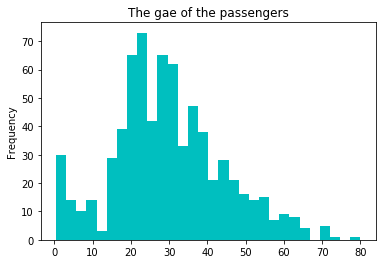

In [18]:
df.Age.plot(kind="hist", title="The gae of the passengers", color='c', bins=30)

### KDE PLOT

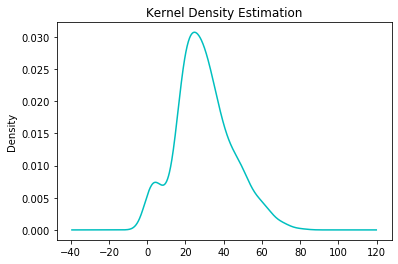

In [19]:
df.Age.plot(kind='kde', title='Kernel Density Estimation', color = 'c')

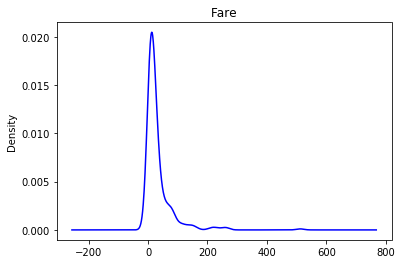

In [20]:
### for Fare

df.Fare.plot(kind="kde", title='Fare', color='b')

###  Skewness

In [25]:
print("Age skweness : {0:.2f}".format(df.Age.skew()))

print("Fare skweness : ", df.Fare.skew())

Age skweness : 0.39
Fare skweness :  4.787316519674893


## Scatter Plot - Bivariate

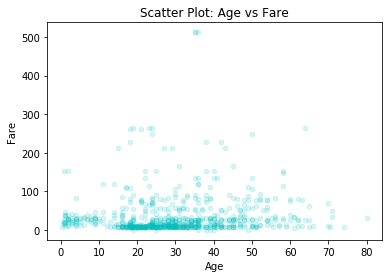

In [26]:
df.plot.scatter(x="Age", y= "Fare" ,color='c', title="Scatter Plot: Age vs Fare", alpha= 0.15)

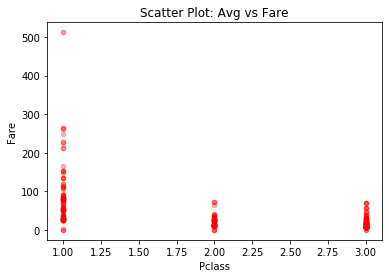

In [28]:
## sactter plot Fare and Class

df.plot.scatter(x  = 'Pclass' , y='Fare' , color ='r' , title="Scatter Plot: Avg vs Fare", alpha=0.15)

## EDA:  Grouping and Aggregations

In [35]:
df.groupby(["Sex"]).Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [36]:
df.groupby('Fare').Fare.median()

Fare
0.0000        0.0000
4.0125        4.0125
5.0000        5.0000
6.2375        6.2375
6.4375        6.4375
6.4500        6.4500
6.4958        6.4958
6.7500        6.7500
6.8583        6.8583
6.9500        6.9500
6.9750        6.9750
7.0458        7.0458
7.0500        7.0500
7.0542        7.0542
7.1250        7.1250
7.1417        7.1417
7.2250        7.2250
7.2292        7.2292
7.2500        7.2500
7.3125        7.3125
7.4958        7.4958
7.5208        7.5208
7.5500        7.5500
7.6292        7.6292
7.6500        7.6500
7.7250        7.7250
7.7292        7.7292
7.7333        7.7333
7.7375        7.7375
7.7417        7.7417
              ...   
80.0000      80.0000
81.8583      81.8583
82.1708      82.1708
83.1583      83.1583
83.4750      83.4750
86.5000      86.5000
89.1042      89.1042
90.0000      90.0000
91.0792      91.0792
93.5000      93.5000
106.4250    106.4250
108.9000    108.9000
110.8833    110.8833
113.2750    113.2750
120.0000    120.0000
133.6500    133.6500
134.5000

In [38]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.2875,37.0
2,14.2500,29.0
3,8.0500,24.0


In [45]:
df.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

#### Aggregations

In [47]:
df.groupby("Pclass").agg({"Fare":'mean', 'Age':'median'})

,Fare,Age
Pclass,,
1,84.154687,37.0
2,20.662183,29.0
3,13.675550,24.0


In [50]:
import numpy as np

In [51]:
aggregations = {
    
    "Fare":{
        "mean_fare":'mean',
        'median_fare':'median',
        'max_fare':max,
        'min_far':np.min
    },
    "Age": {
        "mean_age":'mean',
        'median_age':'median',
        'max_age':max,
        'range_age': lambda x: max(x) - min(x)
    }
}

In [54]:
df.groupby(['Pclass','Sex','Embarked']).agg(aggregations)

Fare                                       Age  \
                         mean_fare median_fare  max_fare  min_far   mean_age   
Pclass Sex    Embarked                                                         
1      female C         115.640309     83.1583  512.3292  27.7208  36.052632   
              Q          90.000000     90.0000   90.0000  90.0000  33.000000   
              S          99.026910     79.6500  263.0000  25.9292  32.704545   
       male   C          93.536707     61.6792  512.3292  26.5500  40.111111   
              Q          90.000000     90.0000   90.0000  90.0000  44.000000   
              S          52.949947     35.0000  263.0000   0.0000  41.897188   
2      female C          25.268457     24.0000   41.5792  12.0000  19.142857   
              Q          12.350000     12.3500   12.3500  12.3500  30.000000   
              S          21.912687     23.0000   65.0000  10.5000  29.719697   
       male   C          25.421250     25.8604   41.5792  12.8750  25.937500   
              Q          12.350000     12.3500   12.3500  12.3500  57.000000   
              S          19.232474     13.0000   73.5000   0.0000  30.875889   
3      female C          14.694926     14.4583   22.3583   7.2250  14.062500   
              Q          10.307833      7.7500   29.1250   6.7500  22.850000   
              S          18.670077     14.4500   69.5500   7.2500  23.223684   
       male   C           9.352237      7.2292   21.6792   4.0125  25.016800   
              Q          11.924251      7.7500   29.1250   6.7500  28.142857   
              S          13.307149      8.0500   69.5500   0.0000  26.574766   

                                                     
                       median_age max_age range_age  
Pclass Sex    Embarked                               
1      female C             37.00    60.0     44.00  
              Q             33.00    33.0      0.00  
              S             33.00    63.0     61.00  
       male   C             36.50    71.0     54.00  
              Q             44.00    44.0      0.00  
              S             42.00    80.0     79.08  
2      female C             22.00    28.0     25.00  
              Q             30.00    30.0       NaN  
              S             29.00    57.0     55.00  
       male   C             29.50    36.0     35.00  
              Q             57.00    57.0      0.00  
              S             30.00    70.0       NaN  
3      female C             14.25    45.0       NaN  
              Q             20.00    39.0     24.00  
              S             23.00    63.0     62.00  
       male   C             26.00    45.5       NaN  
              Q             27.00    70.5       NaN  
              S             25.00    74.0     73.00

### Cross Tab

In [57]:
pd.crosstab(df.Pclass, df.Sex)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


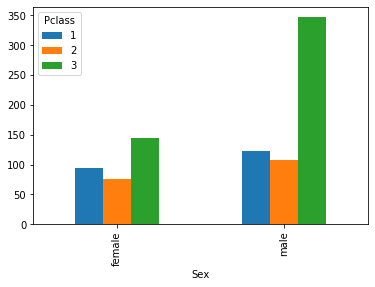

In [59]:
## Plot
pd.crosstab( df.Sex, df.Pclass).plot(kind="bar")

### Pivot Table

In [61]:
df.pivot_table(index= 'Sex', columns = 'Pclass', values= 'Age', aggfunc ='mean')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [62]:
## another way for the same resut  - unstack

In [65]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589
